# Binary Classification Comparative Methods

## Background: The Dataset 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-4) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 3 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [1]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42) 

In [2]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## EDA

In [4]:
import pandas as pd

patient = pd.read_csv("heartdisease.csv")

In [5]:
patient.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [6]:
patient.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [7]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


In [8]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


In [9]:
patient.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
sick        0
dtype: int64

There are no null values in any of the columns. 

In [10]:
patient['sick'] = patient['sick'].astype(int)

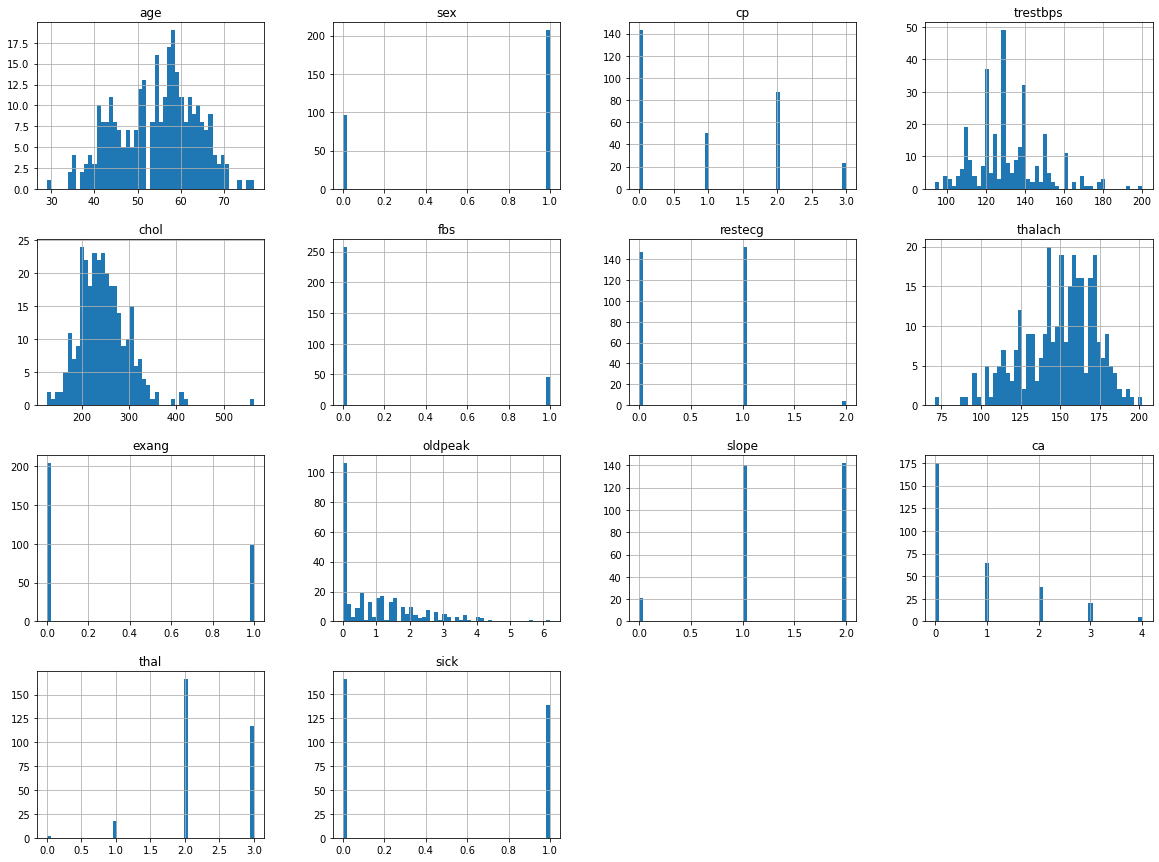

In [11]:
patient.hist(bins = 50, figsize = (20,15))
plt.show()

Gradient (follows a certain distribution) : Age, Chol, trestbps, thalach, oldpeak

Limited selection (discrete values): thal, slope, ca, cp, restecg
    
Binary (either 0 or 1): exang, sick, fbs, sex

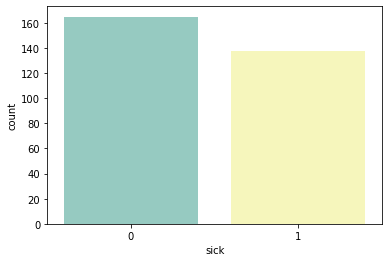

In [12]:
import seaborn as sns

sns.countplot(x="sick", data = patient, palette= "Set3")
plt.show()

In [13]:
patient['sick'].value_counts()

0    165
1    138
Name: sick, dtype: int64

The dataset is relatively balanced as we have almost equal number of sick (138) and healthy patients (165). This will allow our classifier model to perfrom relatively well. 

There are several ways to artificially balance a dataset; the usual methods are downsampling/oversampling, generating synthetic data (augmenting), and weight balancing.

Generally the problem with the resampling methods is that we end up losing the "true" proportions of the two classes to the classifier during the training. This will result in a lower accuracy on future tests in comparison to a classifier trained on an un-modified dataset. 

Furthermore, undersampling usually results in information loss (especially in smaller datasets), while oversampling introduces new noise into the data. 

In [14]:
corr_matrix = patient.corr() 
corr_matrix['sick'].sort_values(ascending = False)

sick        1.000000
exang       0.436757
oldpeak     0.430696
ca          0.391724
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
chol        0.085239
fbs         0.028046
restecg    -0.137230
slope      -0.345877
thalach    -0.421741
cp         -0.433798
Name: sick, dtype: float64

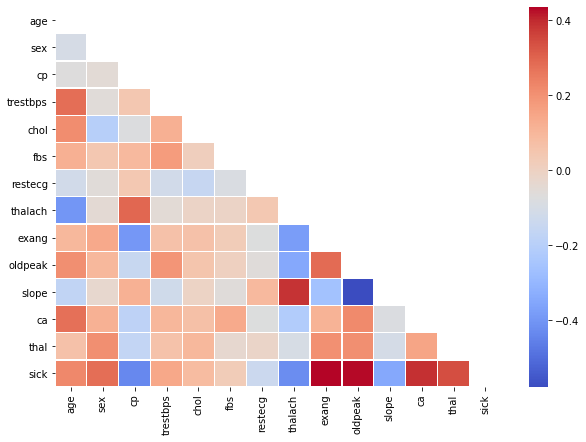

In [15]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr_matrix, linewidths= 0.3, cmap = 'coolwarm', mask = np.triu(corr_matrix))
plt.show()

Positive correlations:

- exang and oldpeak: exercise induced angina is a condition caused by reduced blood flow to the heart muscle, which leads to ischemia. ST depression is a sign of ishcemic heart diseases, therefore it only makes sense that these two are correlated. 
    
- age and trestbps: older people generally have higher resting blood pressure. 
    
- oldpeak and sick: ST depression is a sign of myocardial ischemia, which is highly correlated to having a heart disease.  
    
- exang and sick: exercise induced angina is a precursor for heart disease, as it is caused by reduced blood flow to the heart muscle. 
    

Negative correlations:

- slope and oldpeak: exercising results in a higher ST slope. 

- thalach and exang: exang is caused by the lack of oxygen in the heart. It does not make sense for someone with exang to achieve a high maximum heart rate. 

- thalach and age: as heart function deteriorates over time, it makes sense of older people to not achieve high heart rates. 


One possible reason as to why some variables correlate more highly than others is that some of these data are categorical. When these data are converted into numerical, they dont have much variability, e.g. sex is becomes 0 or 1. Therefore, it is very easy for the correlations, both negative and positive, to be on the extreme sides, especially for binary categories (0 and 1). 


### Save the label column as a separate array and then drop it from the dataframe. 

In [16]:
sick_col = patient['sick']

patient = patient.drop(['sick'], axis = 'columns')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(patient, sick_col, test_size = 0.2, random_state= 42)

In [18]:
print(X_train.shape)
print(y_train.shape)

(242, 13)
(242,)


In [19]:
# k-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print(knn)

y_predict = knn.predict(X_test)

KNeighborsClassifier()


In [20]:
# Report on model Accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.6885245901639344


### Pipeline:

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

numerical_features = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak']

categorical_features = ['exang', 'fbs', 'sex', 'thal', 'slope', 'ca', 'cp', 'restecg']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ])

patient_prepared = full_pipeline.fit_transform(patient)

In [22]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(patient_prepared, sick_col, test_size = 0.2, random_state=42)
print(X_train2.shape)
print(y_train2.shape)

(242, 30)
(242,)


In [23]:
# k-Nearest Neighbors algorithm
knn.fit(X_train2, y_train2)

print(knn)

y_predict2 = knn.predict(X_test2)

KNeighborsClassifier()


In [24]:
# Accuracy
print("Accuracy: ", metrics.accuracy_score(y_test2, y_predict2))

Accuracy:  0.9016393442622951


The accuracy of the KNN algorithm greatly improved (from 0.688 to 0.902) after the pipelining. Standard scaler removes the mean and scales the data to a variance of 1, while one-hot encoder transforms categorical features into numerical arrays.

The usage of standard scaler particularly improves the quality of the data, as it helps to "spread out" data by normalizing them. And since the KNN algorithm involves calculating the distance between feature points, a more "spread out" data will give better predictions, therefore higher accuracy. 

In [25]:
arr = [1,2,3,5,7,9,10,20,50]

for n in arr: 
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train2, y_train2)
    y_pred = knn.predict(X_test2)
    print("Accuracy for n =", n, "is", metrics.accuracy_score(y_test2, y_pred))

Accuracy for n = 1 is 0.8032786885245902
Accuracy for n = 2 is 0.8688524590163934
Accuracy for n = 3 is 0.8688524590163934
Accuracy for n = 5 is 0.9016393442622951
Accuracy for n = 7 is 0.9016393442622951
Accuracy for n = 9 is 0.8852459016393442
Accuracy for n = 10 is 0.8852459016393442
Accuracy for n = 20 is 0.9016393442622951
Accuracy for n = 50 is 0.8852459016393442


### Linear Decision Boundary Methods 

### Logistic Regression

In [26]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression() 
log.fit(X_train2, y_train2)

y_pred_log = log.predict(X_test2)

Accuracy:  0.8852459016393442
Precision:  0.8666666666666667
Recall:  0.896551724137931
F1 score:  0.8813559322033899


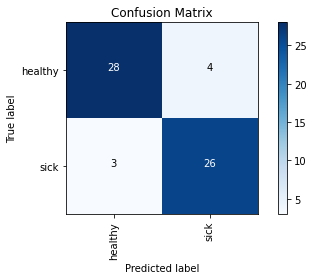

In [27]:
print("Accuracy: ", metrics.accuracy_score(y_test2, y_pred_log))
print("Precision: ", metrics.precision_score(y_test2, y_pred_log))
print("Recall: ", metrics.recall_score(y_test2, y_pred_log))
print("F1 score: ", metrics.f1_score(y_test2, y_pred_log))

draw_confusion_matrix(y_test2, y_pred_log, ['healthy', 'sick'])


### Graph the resulting ROC curve of the model

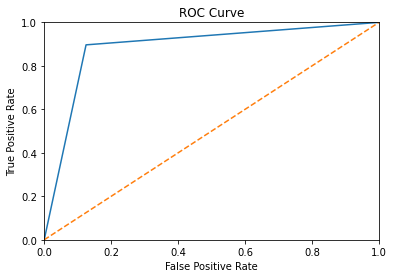

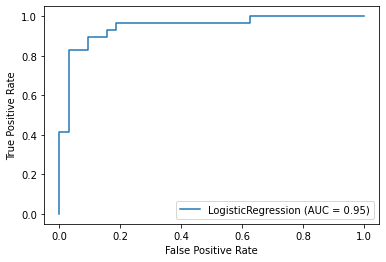

In [28]:
fpr, tpr, thresholds = metrics.roc_curve(y_test2, y_pred_log)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlim([0,1])
plt.ylim([0,1])


metrics.plot_roc_curve(log, X_test2, y_test2)

In [29]:
# Logistic Regression
log_sag = LogisticRegression(solver='sag', max_iter= 10, penalty='none') 
log_sag.fit(X_train2, y_train2)

y_pred_log_sag = log_sag.predict(X_test2)

/Users/wherlim18/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy:  0.8852459016393442
Precision:  0.8666666666666667
Recall:  0.896551724137931
F1 score:  0.8813559322033899


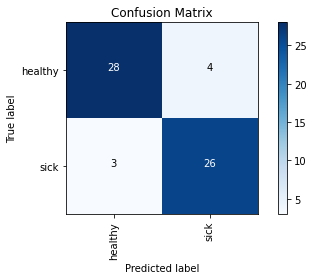

In [30]:
print("Accuracy: ", metrics.accuracy_score(y_test2, y_pred_log_sag))
print("Precision: ", metrics.precision_score(y_test2, y_pred_log_sag))
print("Recall: ", metrics.recall_score(y_test2, y_pred_log_sag))
print("F1 score: ", metrics.f1_score(y_test2, y_pred_log_sag))

draw_confusion_matrix(y_test2, y_pred_log_sag, ['healthy', 'sick'])

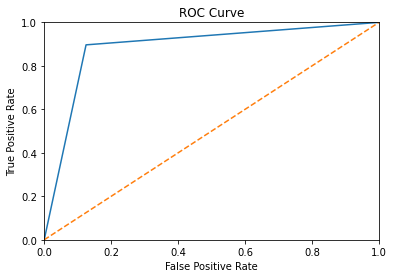

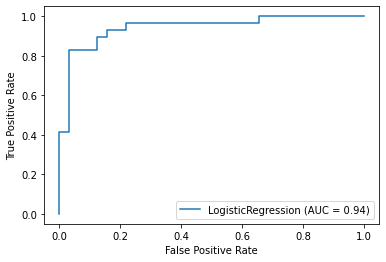

In [31]:
fpr_sag, tpr_sag, thresholds_sag = metrics.roc_curve(y_test2, y_pred_log_sag)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr_sag, tpr_sag)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlim([0,1])
plt.ylim([0,1])

metrics.plot_roc_curve(log_sag, X_test2, y_test2)

In [32]:
# Logistic Regression

log2 = LogisticRegression(solver='sag', max_iter= 10000, penalty='none') 
log2.fit(X_train2, y_train2)

y_pred_log2 = log2.predict(X_test2)

Accuracy:  0.8688524590163934
Precision:  0.8620689655172413
Recall:  0.8620689655172413
F1 score:  0.8620689655172413


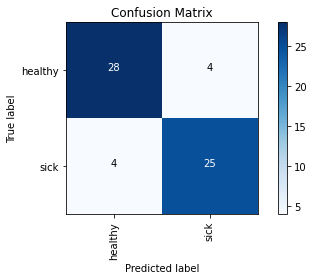

In [33]:
print("Accuracy: ", metrics.accuracy_score(y_test2, y_pred_log2))
print("Precision: ", metrics.precision_score(y_test2, y_pred_log2))
print("Recall: ", metrics.recall_score(y_test2, y_pred_log2))
print("F1 score: ", metrics.f1_score(y_test2, y_pred_log2))

draw_confusion_matrix(y_test2, y_pred_log2, ['healthy', 'sick'])

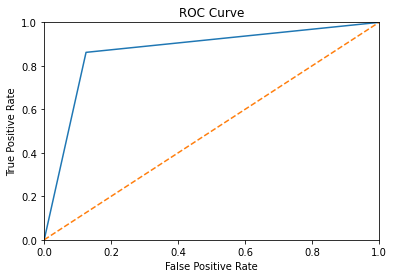

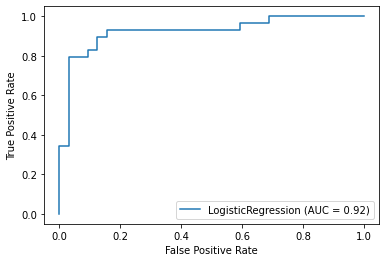

In [34]:
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test2, y_pred_log2)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr2, tpr2)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlim([0,1])
plt.ylim([0,1])

metrics.plot_roc_curve(log2, X_test2, y_test2)

It seems that the initial max_iter of 10 was reached before the solver was able to converge; therefore, I tried increasing the max_iter value to some arbitrary large number, in this case, 10000 and was able to get rid of the error. 

As we increase the number of iterations, although the training set accuracy goes up, the model will be more prone to overfitting. This will cause performance loss during the test set. 

The other parameter that might affect this is the penalty. Regularization techniques such as L1 and L2 help reduce the risk of overfitting by penalizing the flexibility of the model. However, since we set the penalty to 'none', the model is even more prone to overfitting. 

In [35]:
# Logistic Regression
log3 = LogisticRegression(solver='liblinear', penalty='l1') 
log3.fit(X_train2, y_train2)

y_pred_log3 = log3.predict(X_test2)

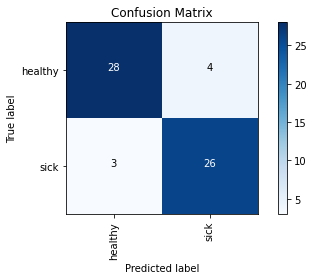

Accuracy:  0.8852459016393442
Precision:  0.8666666666666667
Recall:  0.896551724137931
F1 score:  0.8813559322033899


In [36]:
draw_confusion_matrix(y_test2, y_pred_log3, ['healthy', 'sick'])
print("Accuracy: ", metrics.accuracy_score(y_test2, y_pred_log3))
print("Precision: ", metrics.precision_score(y_test2, y_pred_log3))
print("Recall: ", metrics.recall_score(y_test2, y_pred_log3))
print("F1 score: ", metrics.f1_score(y_test2, y_pred_log3))

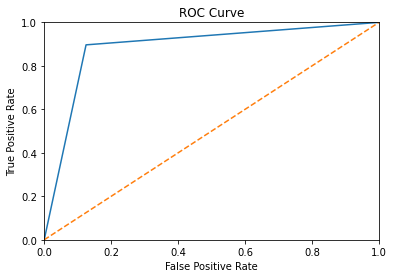

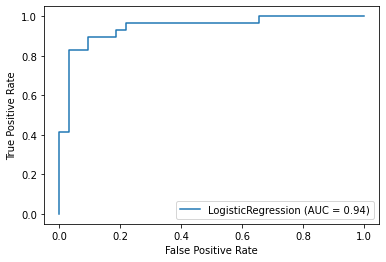

In [37]:
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test2, y_pred_log3)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr3, tpr3)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlim([0,1])
plt.ylim([0,1])

metrics.plot_roc_curve(log3, X_test2, y_test2)

### SVM (Support Vector Machine)

In [38]:
# SVM
from sklearn.svm import SVC

svm = SVC(probability = True, random_state = 42)
svm.fit(X_train2, y_train2)

y_pred_svm = svm.predict(X_test2)


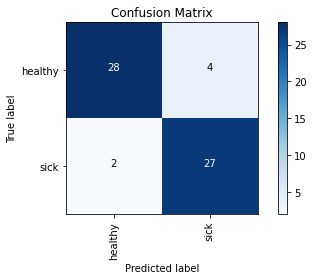

Accuracy:  0.9016393442622951
Precision:  0.8709677419354839
Recall:  0.9310344827586207
F1 score:  0.9


In [39]:
draw_confusion_matrix(y_test2, y_pred_svm, ['healthy', 'sick'])
print("Accuracy: ", metrics.accuracy_score(y_test2, y_pred_svm))
print("Precision: ", metrics.precision_score(y_test2, y_pred_svm))
print("Recall: ", metrics.recall_score(y_test2, y_pred_svm))
print("F1 score: ", metrics.f1_score(y_test2, y_pred_svm))

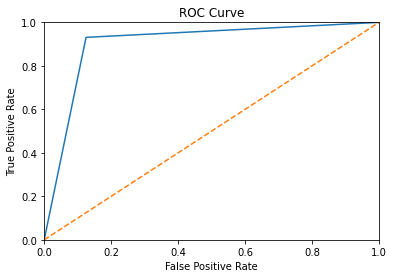

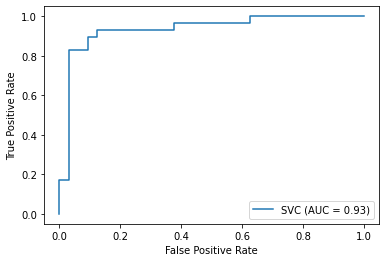

In [40]:
fpr, tpr, thresholds = metrics.roc_curve(y_test2, y_pred_svm)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlim([0,1])
plt.ylim([0,1])

metrics.plot_roc_curve(svm, X_test2, y_test2)

In [41]:
# SVM
from sklearn.svm import SVC

svm2 = SVC(probability = True, random_state = 42, kernel='linear')
svm2.fit(X_train2, y_train2)

y_pred_svm2 = svm2.predict(X_test2)

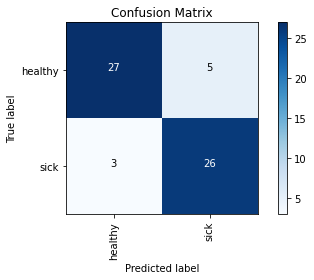

Accuracy:  0.8688524590163934
Precision:  0.8387096774193549
Recall:  0.896551724137931
F1 score:  0.8666666666666666


In [42]:
draw_confusion_matrix(y_test2, y_pred_svm2, ['healthy', 'sick'])
print("Accuracy: ", metrics.accuracy_score(y_test2, y_pred_svm2))
print("Precision: ", metrics.precision_score(y_test2, y_pred_svm2))
print("Recall: ", metrics.recall_score(y_test2, y_pred_svm2))
print("F1 score: ", metrics.f1_score(y_test2, y_pred_svm2))

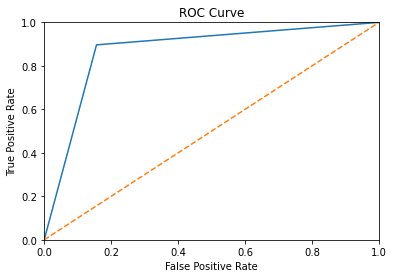

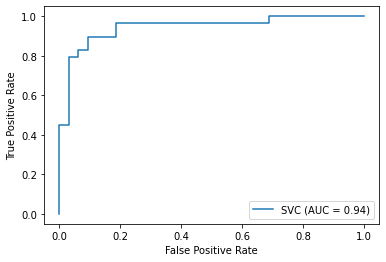

In [43]:
fpr, tpr, thresholds = metrics.roc_curve(y_test2, y_pred_svm2)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlim([0,1])
plt.ylim([0,1])

metrics.plot_roc_curve(svm2, X_test2, y_test2)

Here, we changed the SVM's kernel parameter to 'linear' from the default 'rbf'. 

From the observable results, setting the kernel function to linear ends up in a worse performance than the default 'rbf' kernel. The four scores (accuracy, precision, recall, and f1) went from around low 0.9s average with 'rbf' to mid 0.8s average with linear function. 

The linear kernel function is one dimensional and particularly works well when there are a lot of features. In addition, it is faster than other kernel functions. However, it has good performance only on simple problems; as the boundaries between classes become more complicated, the performance deteroriates quickly. 

The default 'rbf' or the Gaussian Radial Basis Function is generally the preferred kernel function for non-linear data. It is capable of creating the most complex boundaries out of all the kernel functions. Although this function is relatively expensive, its high performance is undeniable. 

There are other kernel functions such as polynomial and sigmoid, which might be better in particular problems. 

SVMs work by building separating hyperplanes between points. Changing this input parameter has a direct impact to the overall performance of the model since kernel functions determine how a SVM separate hyperplanes across various dimensions. Choosing the right kernel function will positively impact the performance of the SVM and vice versa. 

## Baysian (Statistical) Classification

In [44]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() 
gnb.fit(X_train2, y_train2)
y_pred_nb = gnb.predict(X_test2)

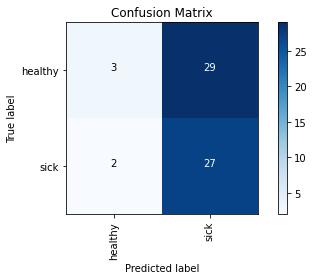

Accuracy:  0.4918032786885246
Precision:  0.48214285714285715
Recall:  0.9310344827586207
F1 score:  0.6352941176470589


In [45]:
draw_confusion_matrix(y_test2, y_pred_nb, ['healthy', 'sick'])
print("Accuracy: ", metrics.accuracy_score(y_test2, y_pred_nb))
print("Precision: ", metrics.precision_score(y_test2, y_pred_nb))
print("Recall: ", metrics.recall_score(y_test2, y_pred_nb))
print("F1 score: ", metrics.f1_score(y_test2, y_pred_nb))

-Number of false positives: 29

-Number of false negatives: 2

## Cross Validation and Model Selection

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

scores_log3 = cross_val_score(log3, X_test2, y_test2, cv = 10)

print("Logistic Regression(L1, 'liblinear'): %0.2f accuracy with a standard deviation of %0.2f" % (scores_log3.mean(), scores_log3.std()))

scores_svm = cross_val_score(svm, X_test2, y_test2, cv = 10)

print("Default SVM: %0.2f accuracy with a standard deviation of %0.2f" % (scores_svm.mean(), scores_svm.std()))

Logistic Regression(L1, 'liblinear'): 0.87 accuracy with a standard deviation of 0.12
Default SVM: 0.82 accuracy with a standard deviation of 0.17


Based on the results from K-Fold Cross Validation, the best performing model is the logistic regression with L1 penaly and 'liblinear' solver as it has higher testing accuracy of 0.87 as opposed to SVM's 0.82. 

However, it is important to note that the four scores (accuracy, precision, recall, and f1) were higher for SVM compared to the logistic regression model when the scores are calculated using one testing set. This means that the testing accuracy was higher than the validation accuracy for the SVM. This might indicate that SVM has higher overfitting than the logistic regression model.  